In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.fft import fft, ifft, fftfreq, fftshift, ifft

# Etape 1 : pre processing 

Dans cette étape nous traiterons les données de la même manière que ce qui est présenté dans l'étude. Nous n'avons pas le choix car la labélisation des données, c'est à dire l' "estimated failure time" découle du traitement direct des données d'accélération. 

In [2]:
data = pd.read_csv('accelerometer.csv')
data

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121
...,...,...,...,...,...
152995,3,100,1.051,0.090,-0.262
152996,3,100,0.918,0.039,-0.129
152997,3,100,1.156,-0.094,-0.227
152998,3,100,0.934,0.203,-0.172


## Séparation du jeu de données en fenetre d'une seconde

In [3]:
#Séparation des données en donction de la configuration utilisé
config1 = np.array(data[data['wconfid'] == 1])
config2 = np.array(data[data['wconfid'] == 2])
config3 = np.array(data[data['wconfid'] == 3])
pd.DataFrame(config1)


,0,1,2,3,4
0,1.0,20.0,1.004,0.090,-0.125
1,1.0,20.0,1.004,-0.043,-0.125
2,1.0,20.0,0.969,0.090,-0.121
3,1.0,20.0,0.973,-0.012,-0.137
4,1.0,20.0,1.000,-0.016,-0.121
...,...,...,...,...,...
50995,1.0,100.0,1.582,-0.980,0.320
50996,1.0,100.0,6.883,0.121,-0.551
50997,1.0,100.0,1.758,1.422,-0.398
50998,1.0,100.0,-0.195,-0.801,0.480


In [4]:
#mise en evidence des différentes vitesses
config1 = np.reshape(config1, [17,-1,5])
config1 = np.transpose(config1, (1, 2, 0))

config2 = np.reshape(config2, [17,-1,5])
config2 = np.transpose(config2, (1, 2, 0))

config3 = np.reshape(config3, [17,-1,5])
config3 = np.transpose(config3, (1, 2, 0))
pd.DataFrame(config1[:,:,0])

,0,1,2,3,4
0,1.0,20.0,1.004,0.090,-0.125
1,1.0,20.0,1.004,-0.043,-0.125
2,1.0,20.0,0.969,0.090,-0.121
3,1.0,20.0,0.973,-0.012,-0.137
4,1.0,20.0,1.000,-0.016,-0.121
...,...,...,...,...,...
2995,1.0,20.0,0.992,0.020,-0.141
2996,1.0,20.0,1.035,-0.090,-0.125
2997,1.0,20.0,0.957,-0.141,-0.148
2998,1.0,20.0,0.980,0.031,-0.125


In [5]:
#Dans cette cellule on sépare chaque observation de 1 minute en 60 observations de 1 seconde. 
newConfig1 = config1.reshape([60,-1,5,17])
newConfig1 = np.transpose(newConfig1, (1,0,2,3))

newConfig2 = config2.reshape([60,-1,5,17])
newConfig2 = np.transpose(newConfig2, (1,0,2,3))

newConfig3 = config3.reshape([60,-1,5,17])
newConfig3 = np.transpose(newConfig3, (1,0,2,3))
pd.DataFrame(newConfig1[:,0,:,0])

,0,1,2,3,4
0,1.0,20.0,1.004,0.090,-0.125
1,1.0,20.0,1.004,-0.043,-0.125
2,1.0,20.0,0.969,0.090,-0.121
3,1.0,20.0,0.973,-0.012,-0.137
4,1.0,20.0,1.000,-0.016,-0.121
5,1.0,20.0,0.961,0.082,-0.121
6,1.0,20.0,0.973,-0.055,-0.109
7,1.0,20.0,1.000,0.012,-0.133
8,1.0,20.0,0.969,-0.102,-0.141
9,1.0,20.0,0.973,-0.059,-0.125


## Extraction d'une paire de frequence et amplitude pour chaque fenetre d'une seconde

Ce travail est réalisé en suivant la méthode décrite dans l'article. on utilise la transformée de fourrier pour obtenir les amplitudes de chaque fenetre du signal. Puis on retient la RMS des amplitudes comme référence pour chaque fenêtre. 

In [7]:
Config1Pair = np.zeros([60,17,3])
Config2Pair = np.zeros([60,17,3])
Config3Pair = np.zeros([60,17,3])
n = 50
fe = 50
for i in range(60): 
    for j in range(17):
        for k in range(3):
            signal1 = newConfig1[:,i,k+2,j]
            signal2 = newConfig2[:,i,k+2,j]
            signal3 = newConfig3[:,i,k+2,j]

            X1 = np.fft.fft(signal1)
            X1 = 2/n * np.abs(X1[0:n//2])

            X2 = np.fft.fft(signal2)
            X2 = 2/n * np.abs(X2[0:n//2])
            
            X3 = np.fft.fft(signal3)
            X3 = 2/n * np.abs(X3[0:n//2])

            # Obtenir les fréquences correspondant aux amplitudes
            freqs = np.fft.fftfreq(n, 1/fe)

            Config1Pair[i,j,k] = np.sqrt(np.mean((X1)**2))
            

            Config2Pair[i,j,k] = np.sqrt(np.mean((X2)**2))
            

            Config3Pair[i,j,k] = np.sqrt(np.mean((X3)**2))

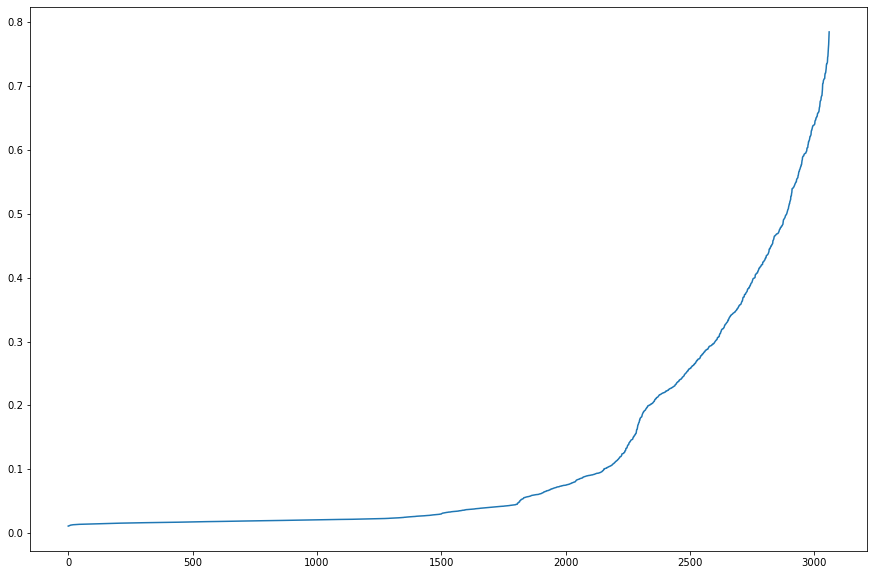

In [8]:
col = ['X', 'Y', 'Z']
test3 = pd.DataFrame(Config3Pair.reshape(-1,3))
test3.columns = col
test2 = pd.DataFrame(Config2Pair.reshape(-1,3))
test2.columns = col
test1 = pd.DataFrame(Config1Pair.reshape(-1,3))
test1.columns = col
data = pd.concat([test1, test2, test3])

# comme décrit dans l'article les amplitudes selon l'axe X ne sont pas conservée 
# car l'accéléromètre est plaçé de façon à ce qu'aucune vibration ne soit engendré sur cet axe. 
data.drop(['X'], inplace = True, axis = 1)
plt.figure(figsize=[15,10])
# Visualisation
plt.plot(sorted(data['Y']))

Toujours en suivant la méthodologie de l'article, différents "Growth rate" (gr) sont utilisé arbitrairement. Dans l'atricles les gr 0.01, 0.02 et 0.05 sont utilisé. Nous ferons de même

In [9]:
datagr1 = data
datagr1['gr'] = 0.01

datagr2 = data
datagr2['gr'] = 0.02

datagr3 = data
datagr3['gr'] = 0.05

finaldataset = pd.concat([datagr1, datagr2, datagr3])


In [10]:
# Définition de la formule pour calculer le temps pour atteindre la limite de resistance selon chaque axe
def FTx(x, xlim, gr):
    return (xlim - x)/(x*gr)

In [11]:
#xlim est fixé arbitrairement comme le max du dataset sur l'axe d'intéret. 
ylim = max(finaldataset['Y'])
zlim = max(finaldataset['Z'])
finaldataset['FTy'] = FTx(finaldataset['Y'], ylim, finaldataset['gr'])
finaldataset['FTz'] = FTx(finaldataset['Z'], zlim, finaldataset['gr'])

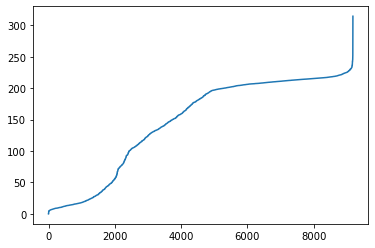

In [12]:
plt.plot(sorted(finaldataset['FTz']))

In [13]:
# Le failure time estimated est calculé comme dans l'article par la moyenne des failure time sur chaque axe 
finaldataset['FTe'] = (finaldataset['FTy'] + finaldataset['FTz'])/2

In [14]:
#Dataset final
finaldataset

,Y,Z,gr,FTy,FTz,FTe
0,0.022119,0.052232,0.05,689.613168,200.622954,445.118061
1,0.020569,0.052321,0.05,743.113057,200.247915,471.680486
2,0.018257,0.052031,0.05,839.728254,201.474973,520.601613
3,0.013321,0.051810,0.05,1158.347630,202.419958,680.383794
4,0.016358,0.051285,0.05,939.522112,204.694643,572.108377
...,...,...,...,...,...,...
1015,0.022849,0.056282,0.05,666.968017,184.746974,425.857495
1016,0.029690,0.043370,0.05,508.681081,245.701735,377.191408
1017,0.034694,0.059388,0.05,432.426907,174.039946,303.233427
1018,0.040170,0.065045,0.05,370.749888,157.164271,263.957079


## Répartion du dataset en train set et test set (80/20)

In [15]:
#Nous répartissons maintenant le dataset en ensemble d'entrainement et ensemble de test
from sklearn.model_selection import train_test_split

# X représente les caractéristiques (features) du dataset
# y représente les étiquettes (labels) du dataset

# Diviser le dataset en train set (80%) et test set (20%)
X_train, X_test, y_train, y_test = train_test_split(finaldataset[['Y', 'Z','gr']], finaldataset['FTe'], test_size=0.2, random_state=42)

In [16]:
#Definition de la métrique d'évaluation du modèle : Root Mean Squared error (RMSe)
def rmse(y_pred, y_test): 
    return np.sqrt(np.mean((y_pred - y_test)**2))

## Baseline Multilayer perceptron Neural network : mêmes paramètres que dans l'article. 

In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

RMSe : 10.741092590652848


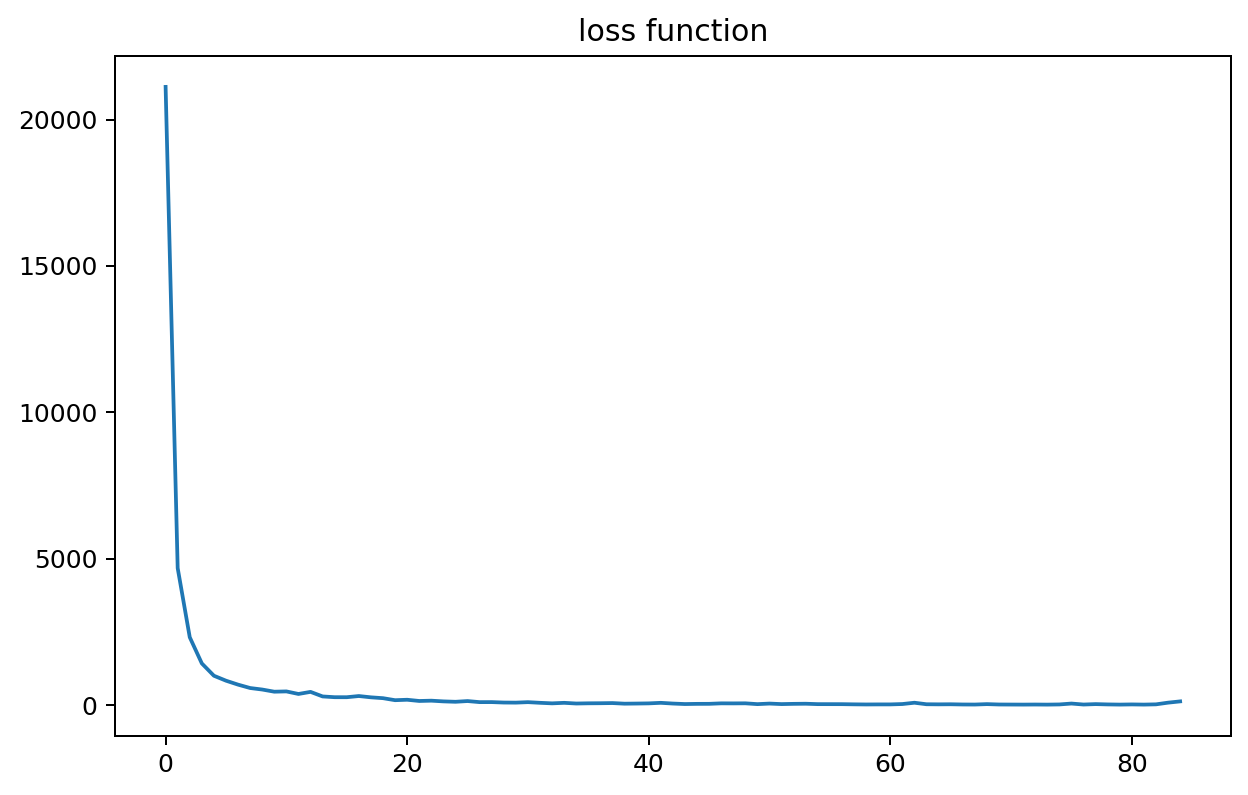

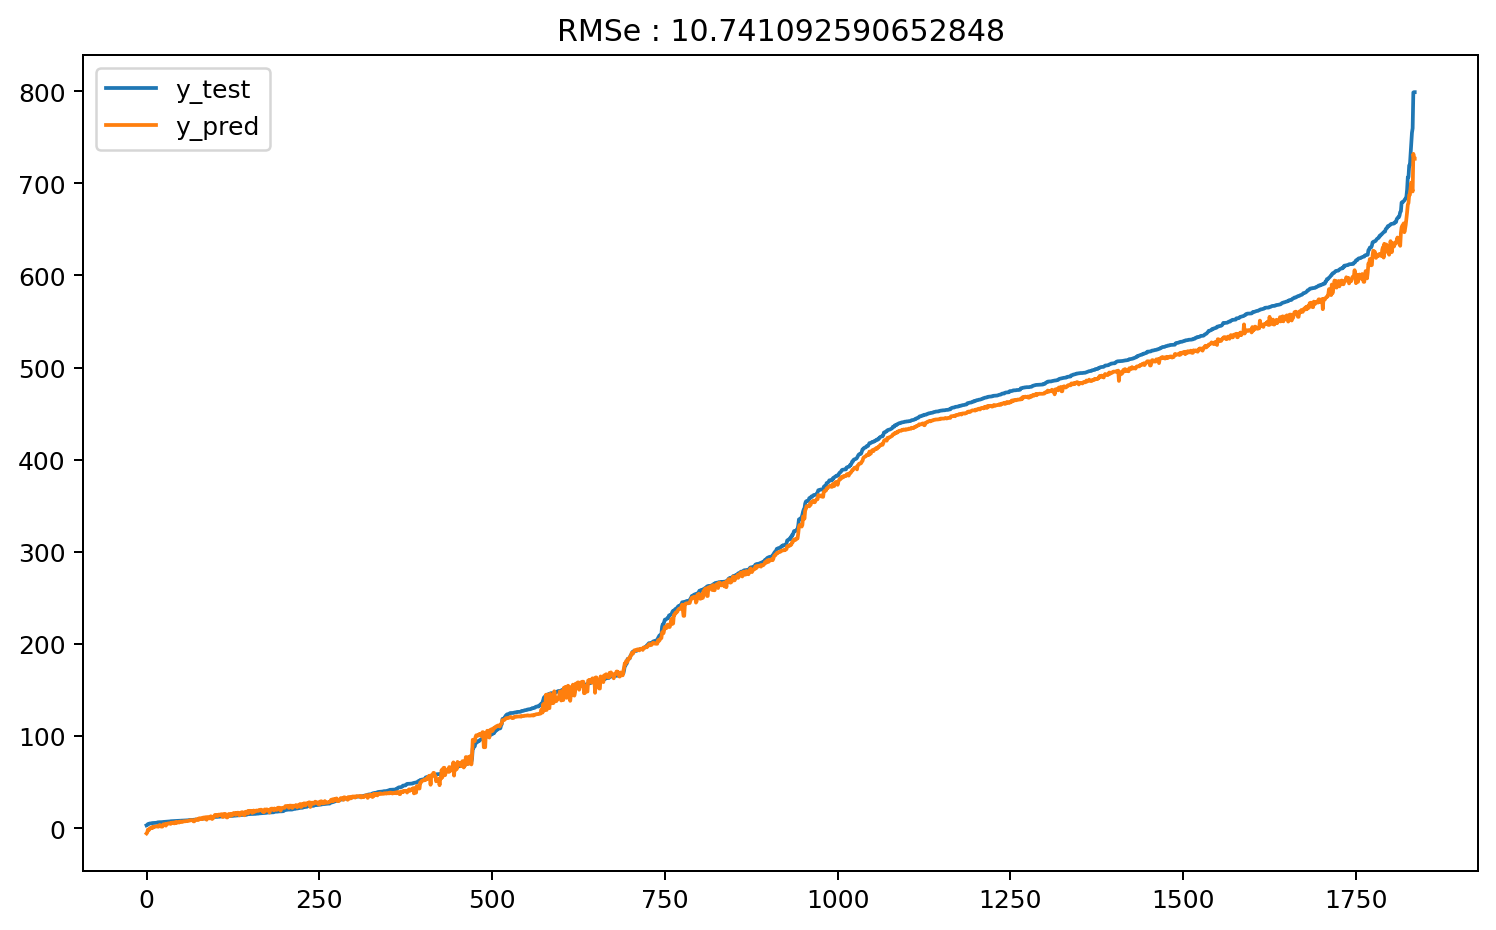

In [18]:
#Baseline

#définition des paramètre du réseau de neuronne
Hlayers = 1
sizeHidden = 25
learningRate = 0.85
maxIter = 50000

regr = MLPRegressor(activation = 'relu', random_state=1, max_iter = maxIter, learning_rate_init = learningRate, hidden_layer_sizes = sizeHidden).fit(X_train, y_train)
y_pred  = regr.predict(X_test)

#Visualisation de la loss function
loss = regr.loss_curve_
plt.figure(dpi=180, figsize = (8, 5))
plt.plot(loss)
plt.title('loss function')

#Construction du dataframe avec les resultats
y_test.reset_index(inplace=True, drop=True)
baseline = pd.concat([y_test, pd.DataFrame(y_pred)], axis=1)
baseline.columns =['y_test', 'y_pred']
baseline.sort_values(by= 'y_test', inplace=True)
baseline.reset_index(inplace=True, drop=True)

#Calcule de la metrique de validation et visualisation du résultat
RMSe_baseline = rmse(baseline['y_pred'], baseline['y_test'])
plt.figure(dpi=180, figsize = (10, 6))
plt.plot(baseline['y_test'], label = 'y_test')
plt.plot(baseline['y_pred'], label = 'y_pred')
plt.legend()
plt.title('RMSe : {}'.format(RMSe_baseline))


print('RMSe : {}'.format(RMSe_baseline))

Les resultat obtenus avec la baseline ne sont pas très bon. RMSe = 10.74

# Cherchons à améliorer ce resultat : 
## 1 : modifier les paramètres de l'algo
## 2 : exploration d'un autre algo.

pour chaque Algorithme utilisé nous allons chercher les meilleurs paramètres en utilisant la classe gridsearch de SickitLearn. 

In [19]:
#GridSearch
# Définition des valeurs à tester pour les paramètres
param_grid = {'learning_rate_init' : [1, 0.5, 0.1 , 0.01],
              'hidden_layer_sizes' : [[50], [50, 50], [50, 50, 50], 
                                     [100], [100, 100], [100, 100, 100], 
                                     [150], [150, 150], [150, 150, 150]],
              'activation' : ['relu'],
              'random_state' : [1],
              'max_iter' : [maxIter]

}

# Création de l'estimateur SVM pour la régression
NN = MLPRegressor()

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(estimator=NN, param_grid=param_grid, verbose = 1, cv = 5)

# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtention des meilleurs paramètres et du meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Utilisation du modèle avec les meilleurs paramètres pour faire des prédictions
y_pred = grid_search.predict(X_test)

# Évaluation des performances du modèle
RMSe_NN = rmse(y_pred, y_test)
print('les meilleurs paramètres pour cet algo sont {} avec un score de {}'.format(best_params, best_score))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
les meilleurs paramètres pour cet algo sont {'activation': 'relu', 'hidden_layer_sizes': [150], 'learning_rate_init': 0.01, 'max_iter': 50000, 'random_state': 1} avec un score de 0.999961385166619


Text(0.5, 1.0, 'RMSe : 1.4266785987850161')

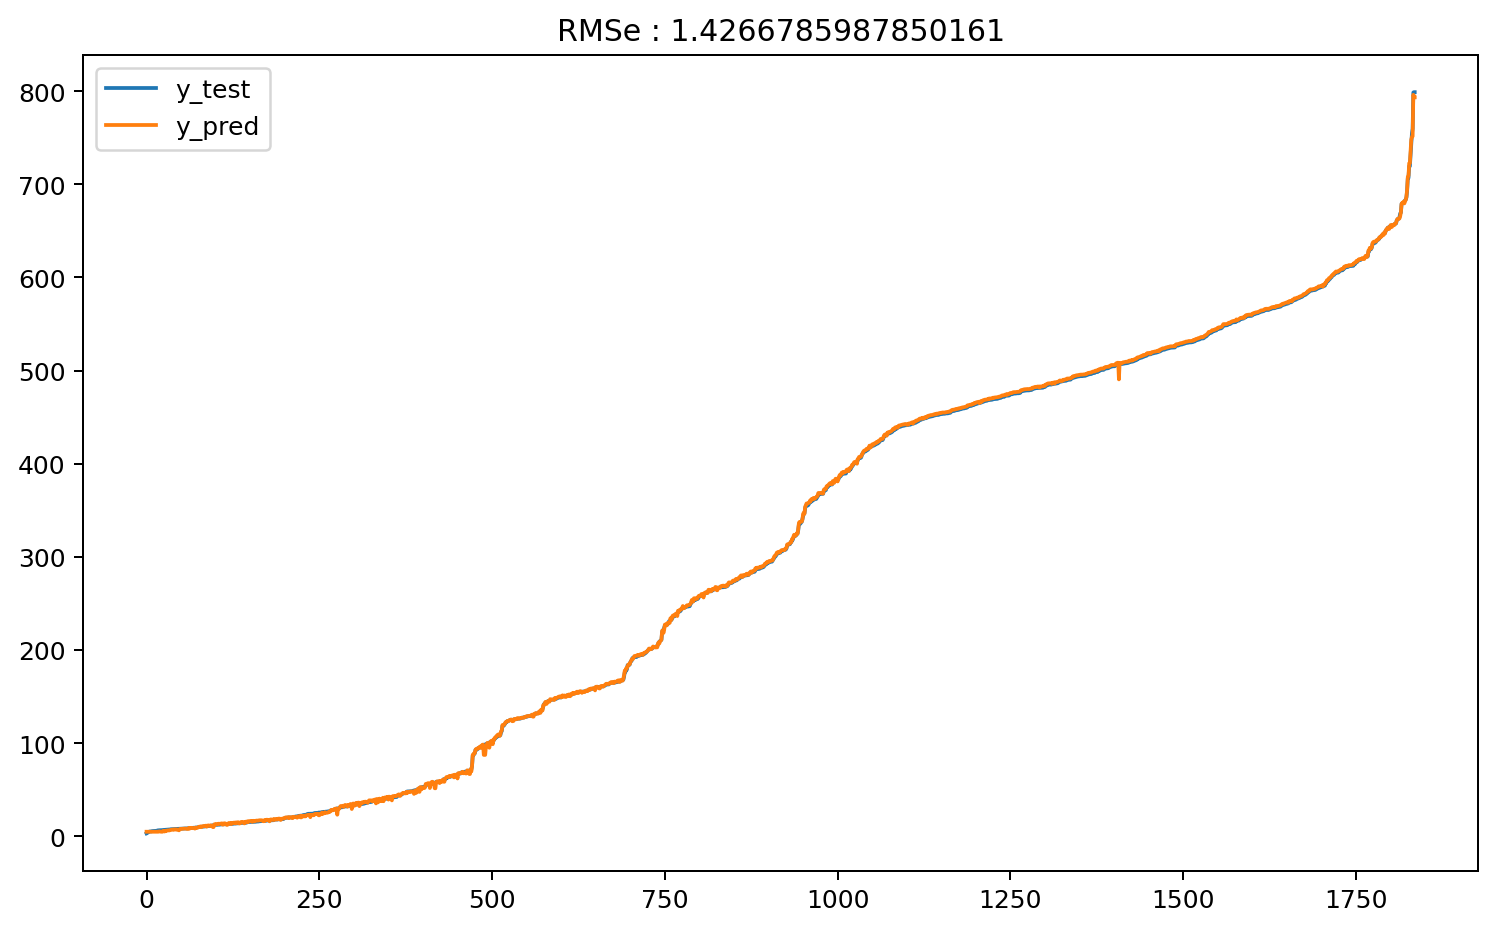

In [20]:
# Visulalisation du resultat
result_NN = pd.concat([y_test, pd.DataFrame(y_pred)], axis=1)
result_NN.columns =['y_test', 'y_pred']
result_NN.sort_values(by= 'y_test', inplace=True)
result_NN.reset_index(inplace=True, drop=True)
plt.figure(dpi=180, figsize = (10, 6))
plt.plot(result_NN['y_test'], label = 'y_test')
plt.plot(result_NN['y_pred'], label = ('y_pred'))
plt.legend()
plt.title('RMSe : {}'.format(RMSe_NN))

En changeant les paramètres, nous avons grandement amélioré les résultat de l'algorithme. RMSe = 1.43 contre plus de 10 pour la baseline. Voyons si nous pouvons encore améliorer ce resultat avec d'autres algorithmes de regression.

Les meilleurs paramètres pour cet algorithms sont : 
- une couche de 150 neurones
- 'learning_rate_init': 0.01


## Exploration d'autres algo

## 1 : RANDOM FOREST

In [21]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#GridSearch

# Définition des valeurs à tester pour les paramètres
param_grid = {'n_estimators' : [600, 900, 1200],
              'min_samples_split' : [2, 3, 4, 5, 6],
              'min_samples_leaf' : [1,2,3,4,5]            

}

# Création de l'estimateur SVM pour la régression
RF = RandomForestRegressor()

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(estimator = RF, param_grid=param_grid, verbose = 1, cv = 5)

# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtention des meilleurs paramètres et du meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Utilisation du modèle avec les meilleurs paramètres pour faire des prédictions
y_pred = grid_search.predict(X_test)

# Évaluation des performances du modèle
rmse_RF = rmse(y_pred, y_test)
print('les meilleurs paramètres pour cet algo sont {} avec un score de {}'.format(best_params, best_score))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
les meilleurs paramètres pour cet algo sont {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600} avec un score de 0.9999840642263264


Text(0.5, 1.0, 'RMSe : 0.8079839368413615')

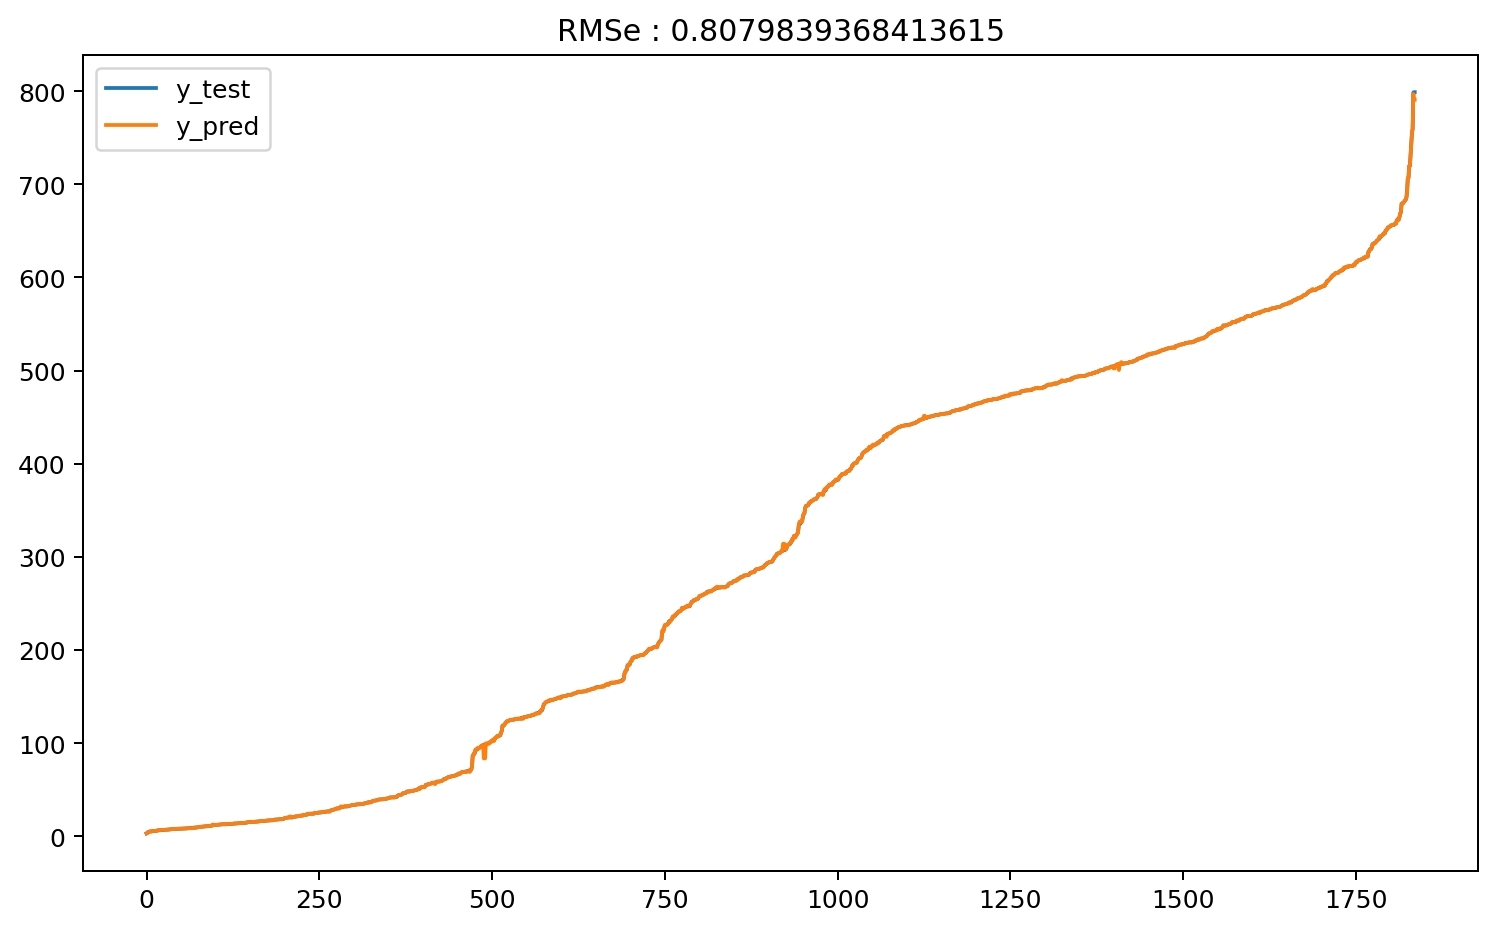

In [22]:
# Visulalisation du resultat
result_RF = pd.concat([y_test, pd.DataFrame(y_pred)], axis=1)
result_RF.columns =['y_test', 'y_pred']
result_RF.sort_values(by= 'y_test', inplace=True)
result_RF.reset_index(inplace=True, drop=True)
plt.figure(dpi=180, figsize = (10, 6))
plt.plot(result_RF['y_test'], label = 'y_test')
plt.plot(result_RF['y_pred'], label = ('y_pred'))
plt.legend()
plt.title('RMSe : {}'.format(rmse_RF))

La technique du Search a été utilisé pour l'algorithme random forest : 
les meilleurs paramètres trouvés sont : 
- 'min_samples_leaf': 1
- 'min_samples_split': 2
- 'n_estimators': 600

la valeurs RMSe entre les prediction et et les y_test est : 0.80

## 2 : SUPPORT VECTOR MACHINE (SVR)

In [23]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [24]:
# Support Vector Machine

# Définition des valeurs à tester pour les paramètres
param_grid = {'kernel' : ['rbf'],
              'gamma' : [10, 20, 30],
              'C' : [10,20,30], 
              'tol' : [0.0001], 
              'epsilon': [0.0005]

}

# Création de l'estimateur SVM pour la régression
svr = SVR()


# Création de l'objet GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5)


# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtention des meilleurs paramètres et du meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Utilisation du modèle avec les meilleurs paramètres pour faire des prédictions
y_pred = grid_search.predict(X_test)

# Évaluation des performances du modèle
rmse_svm = rmse(y_pred, y_test)
print('les meilleurs paramètres pour cet algo sont {} avec un score de {}'.format(best_params, best_score))

les meilleurs paramètres pour cet algo sont {'C': 30, 'epsilon': 0.0005, 'gamma': 30, 'kernel': 'rbf', 'tol': 0.0001} avec un score de 0.9615317691520303


Text(0.5, 1.0, 'RMSe : 41.71977236977897')

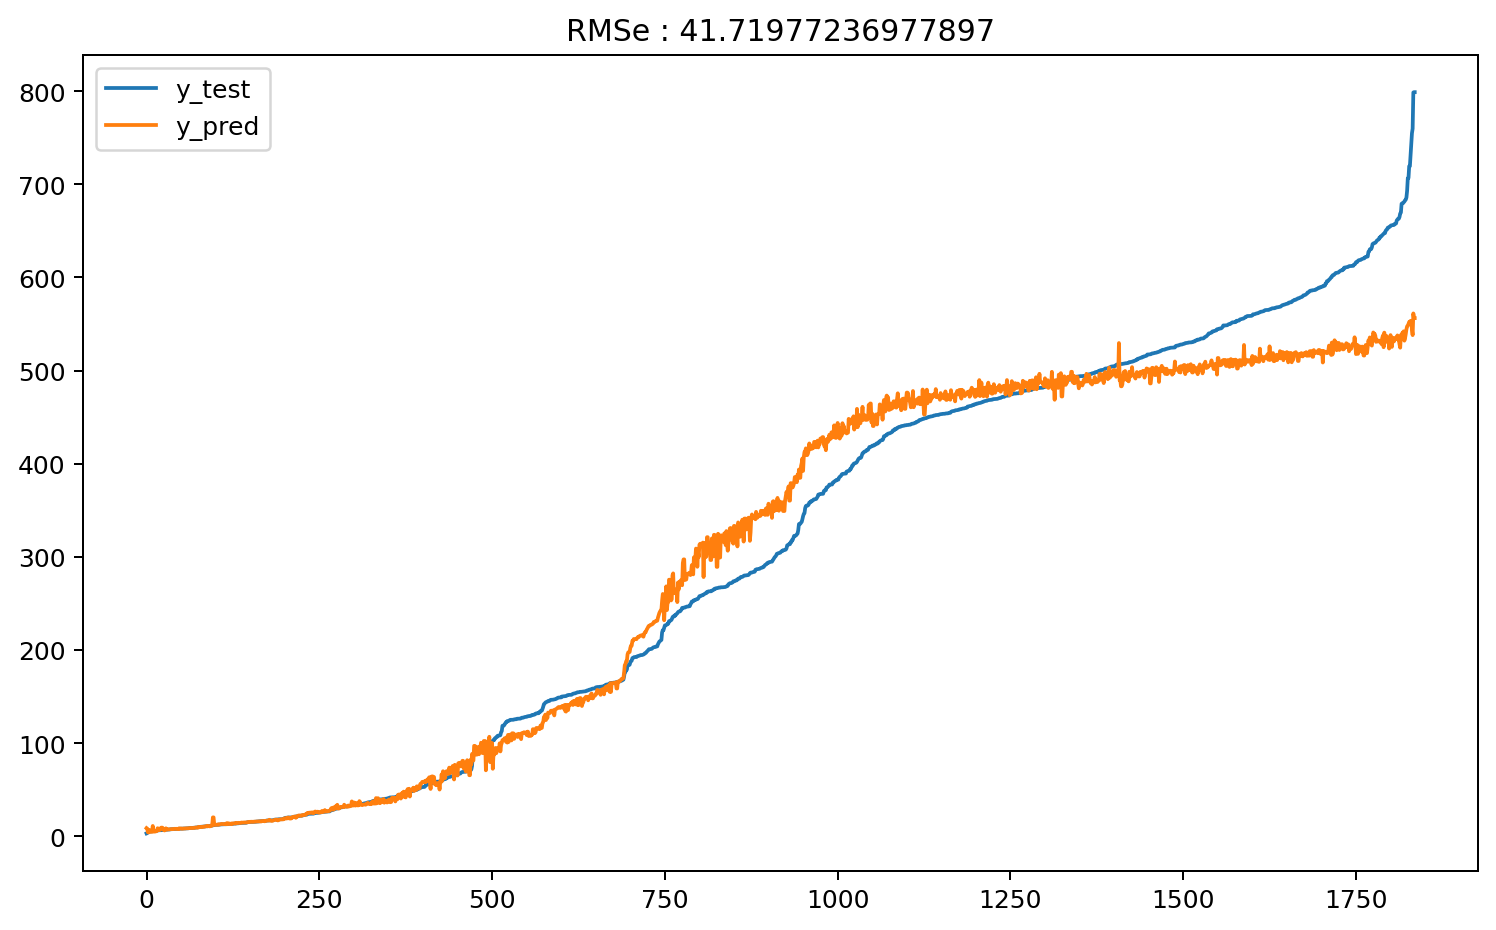

In [25]:
# Visulalisation du resultat
result_SVM = pd.concat([y_test, pd.DataFrame(y_pred)], axis=1)
result_SVM.columns =['y_test', 'y_pred']
result_SVM.sort_values(by= 'y_test', inplace=True)
result_SVM.reset_index(inplace=True, drop=True)
plt.figure(dpi=180, figsize = (10, 6))
plt.plot(result_SVM['y_test'], label = 'y_test')
plt.plot(result_SVM['y_pred'], label = ('y_pred'))
plt.legend()
plt.title('RMSe : {}'.format(rmse_svm))

L'algorithme Support Vector Machine ne semble pas très performant, du moins avec ces paramètres. Il semble y avoir de l'overfitting car le score est bon sur l'ensemble d'apprentissage et mauvais sur celui de test. 

## 3 : regression tree

In [31]:
#GridSearch
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
minSplit = [5, 10, 30, 50, 100]
minBucket = [round(x/3) for x in minSplit]
# Définition des valeurs à tester pour les paramètres
param_grid = {
    'min_samples_split' : [5, 10, 30, 50, 100],
    'min_samples_leaf' : minBucket,
    'ccp_alpha' : [0.0000001, 0.0000005],
    'max_depth' : [30, 40, 50, 60]
}

# Création de l'estimateur SVM pour la régression
tree_regressor = DecisionTreeRegressor()

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(estimator=tree_regressor, param_grid=param_grid, cv=5)

# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtention des meilleurs paramètres et du meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Utilisation du modèle avec les meilleurs paramètres pour faire des prédictions
y_pred = grid_search.predict(X_test)

# Évaluation des performances du modèle
RMSe_tree = rmse(y_pred, y_test)
print('les meilleurs paramètres pour cet algo sont {} avec un score de {}'.format(best_params, best_score))


les meilleurs paramètres pour cet algo sont {'ccp_alpha': 5e-07, 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 5} avec un score de 0.9999637661544615


Text(0.5, 1.0, 'RMSe : 0.9467629606532936')

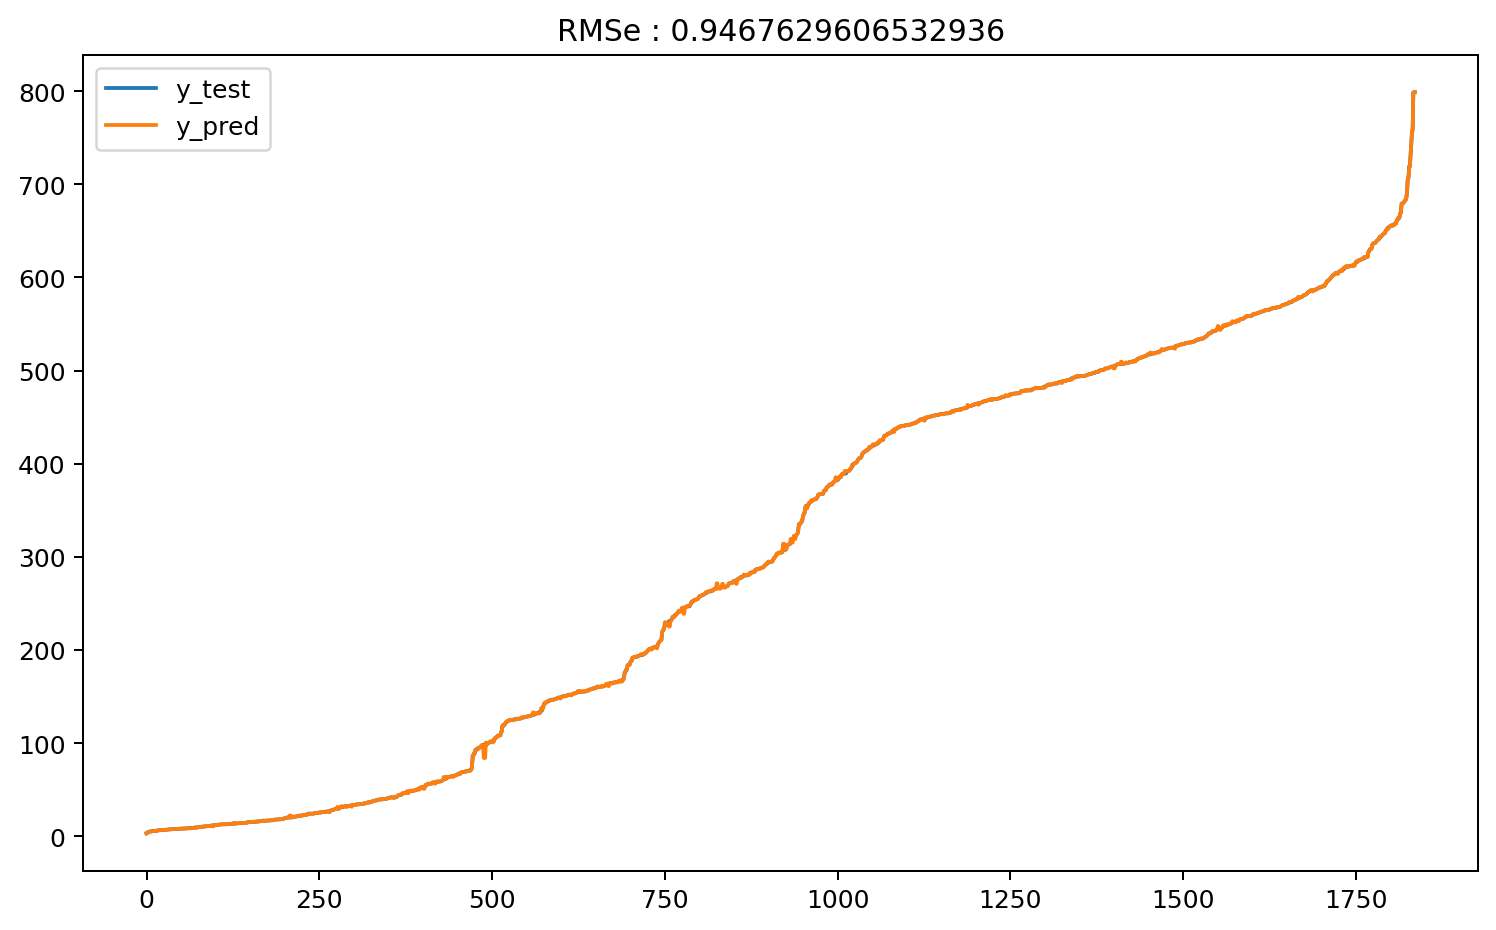

In [32]:
# Visulalisation du resultat
result_tree = pd.concat([y_test, pd.DataFrame(y_pred)], axis=1)
result_tree.columns =['y_test', 'y_pred']
result_tree.sort_values(by= 'y_test', inplace=True)
result_tree.reset_index(inplace=True, drop=True)
plt.figure(dpi=180, figsize = (10, 6))
plt.plot(result_tree['y_test'], label = 'y_test')
plt.plot(result_tree['y_pred'], label = ('y_pred'))
plt.legend()
plt.title('RMSe : {}'.format(RMSe_tree))

La technique du Search a été utilisé pour l'algorithme random forest : 
les meilleurs paramètres trouvés sont : 
- 'ccp_alpha': 1e-07
- 'max_depth': 50
- 'min_samples_leaf': 2
- 'min_samples_split': 5

la valeurs RMSe entre les prediction et et les y_test est : 0.95



In [33]:
result_RF

,y_test,y_pred
0,3.009007,3.063674
1,3.327570,3.407482
2,4.449363,4.410113
3,4.470070,4.529382
4,4.924250,5.125342
...,...,...
1831,754.897591,755.527366
1832,759.780106,759.194983
1833,798.654972,797.132507
1834,798.965924,790.757257


Text(0.5, 1.0, 'squared errors of models')

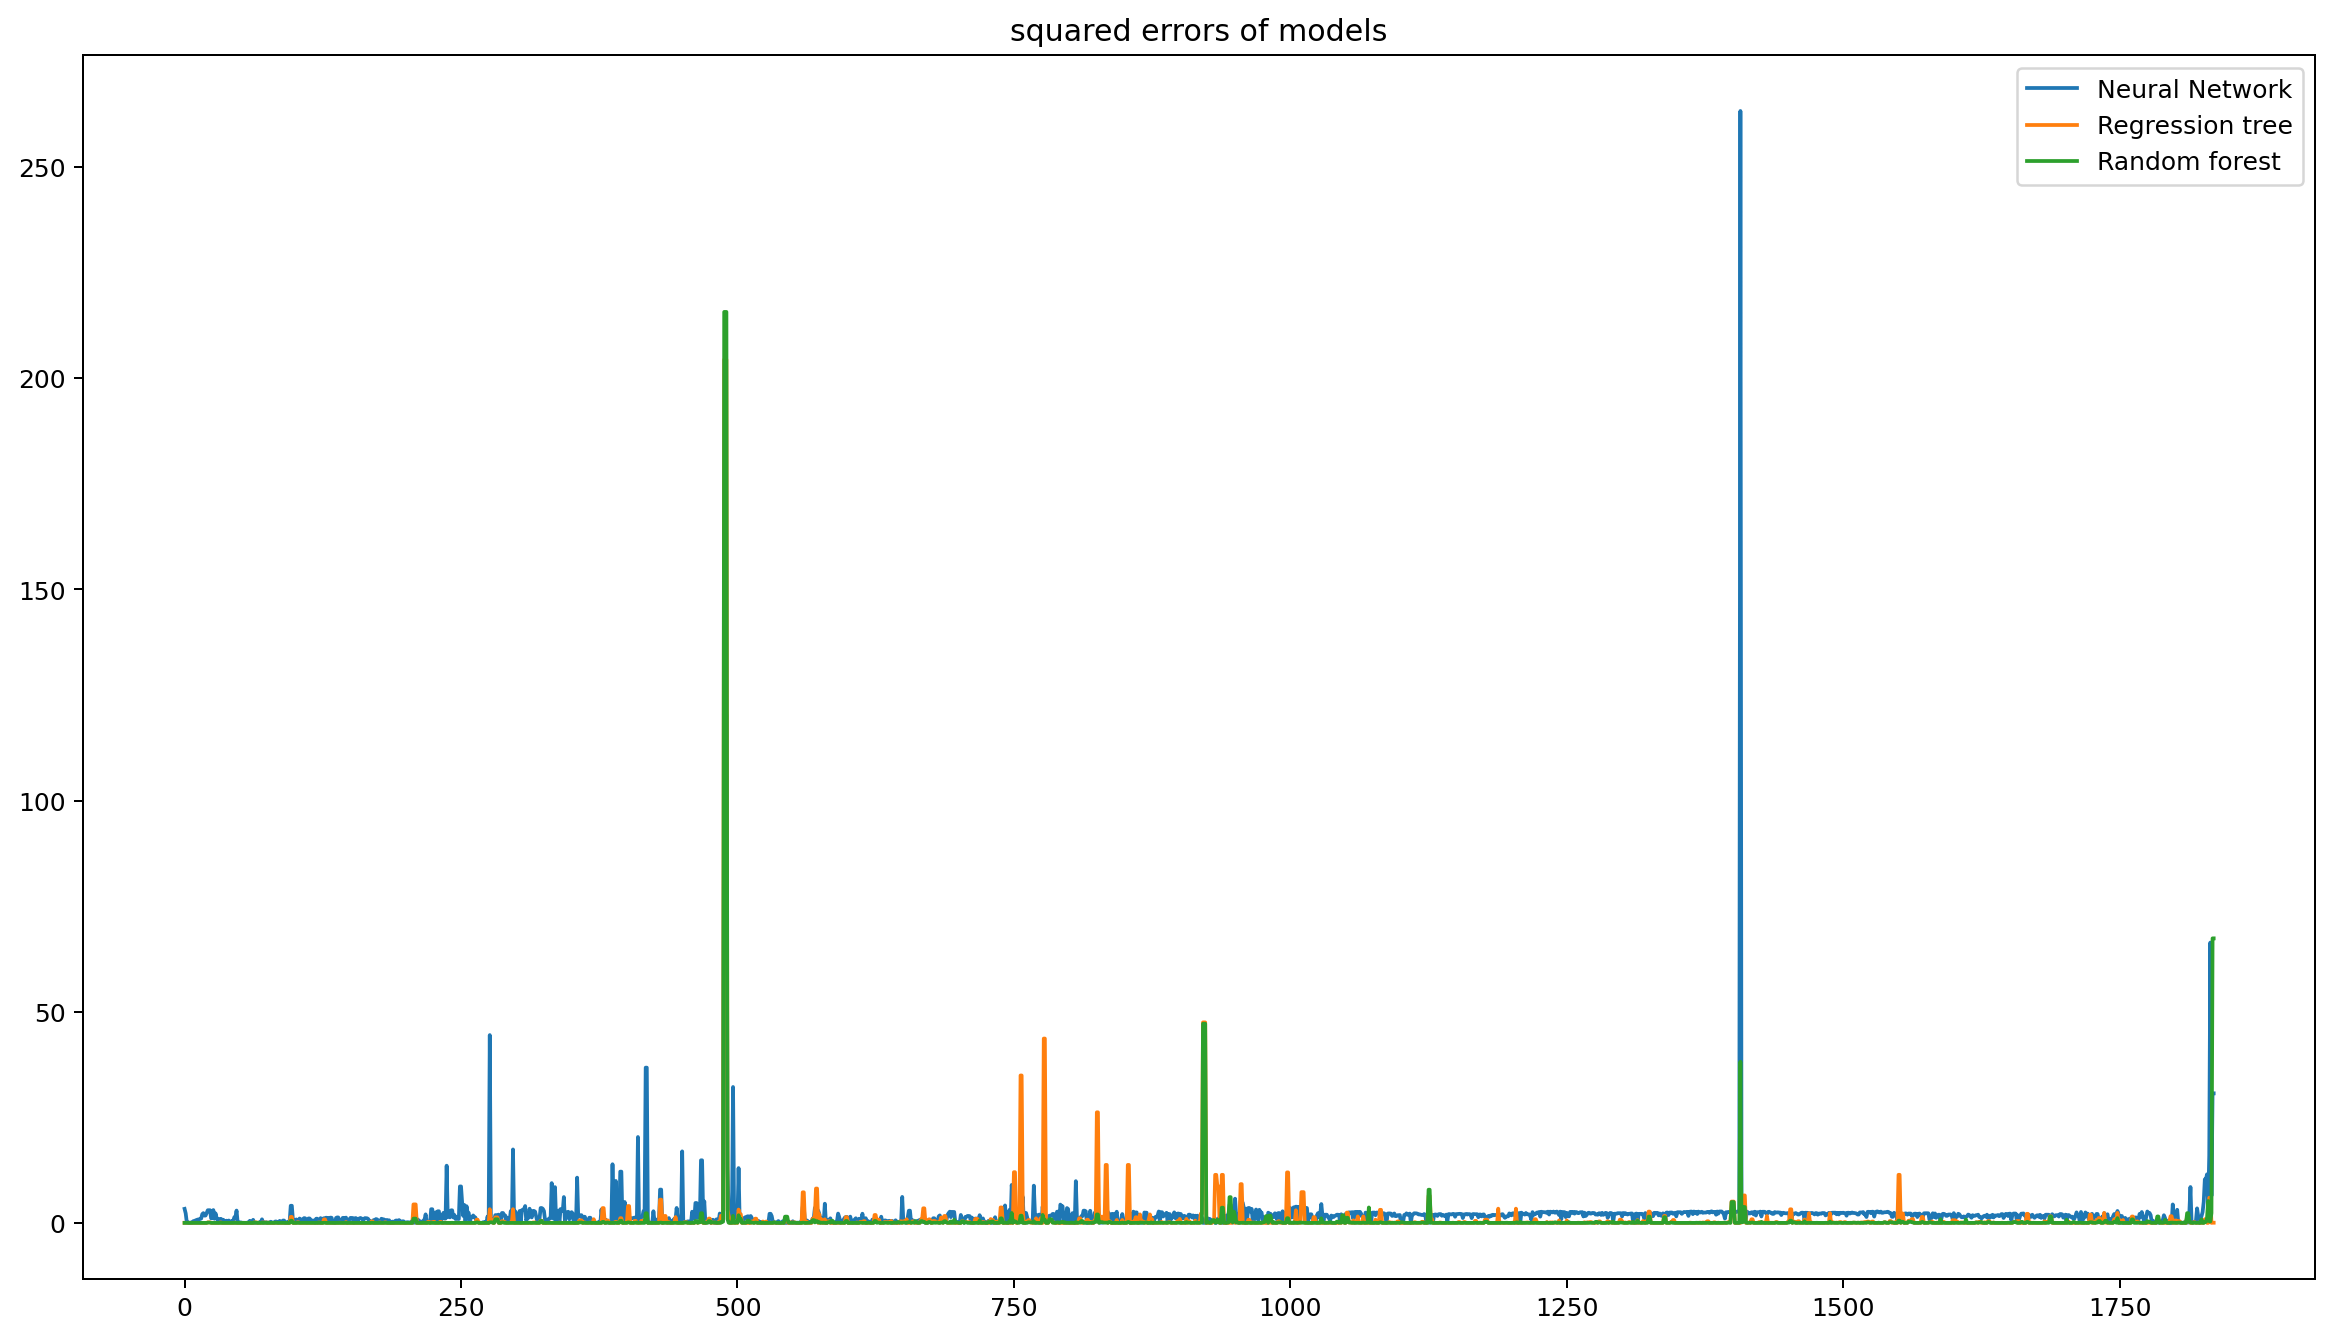

In [40]:
plt.figure(dpi = 180, figsize = (16,9))

plt.plot((result_NN['y_test']-result_NN['y_pred'])**2, label ='Neural Network')
plt.plot((result_tree['y_test']-result_tree['y_pred'])**2, label ='Regression tree')
plt.plot((result_RF['y_test']-result_RF['y_pred'])**2, label ='Random forest')
plt.legend()
plt.title('squared errors of models')

On voit sur le graph ci dessus que le model Random forest est excellent et qu'il a quelques points ou l'erreur est grande mais cela est très localisé. 

# Conclusion

Le meilleur modèle est le random forest avec les paramètres : 
- 'min_samples_leaf': 1
- 'min_samples_split': 2
- 'n_estimators': 600

Les results restent nettement moins bons que ceux de l'article avec une RMSe minimale de 0.0026 pour le random forest également. 
Il est a noté que malgré l'utilisation de la methode gridsearch, il est encore possible de mieux régler les paramètres du modèle pour optenir de meilleurs résultat. De plus bien que les résultats soient moins bon que ceux de l'article, le modèle reste précis et utilisable. 
